In [13]:

from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())

%matplotlib inline               

pykat.init_pykat_plotting(dpi=200)

AD detectors amplitude
0.301360664245641
0.0291929055180576
0.0174191398432654
0.0160418225767651
0.0210770753746061
0.0567320645557047
0.053974285554556
0.0208041419241795
0.016007804494538
0.0175414447665311
0.0298934618820687
total of AD detectors =  0.10069761942157682
PD detector =  [0.10069762 0.10069762]
Power from AD detectors
0.09081824995457397
0.0916704756871602
0.09197390212003945
0.09223124219162386
0.09267548529797069
0.09589401244672334
0.0988072359478481
0.0992400482690495
0.09949629807378485
0.09980400035828212


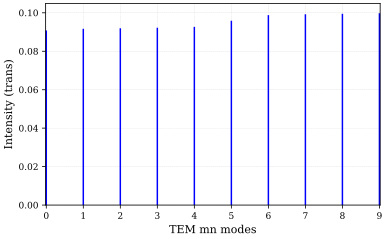

In [15]:
code1="""

#input laser
l L0 1 0 n0


const l 9.1                   #cavity length
const tr 0.1                #T of ETM, ITM
const L 50u                   #L of ETM, ITM


#HG modes
tem L0 0 0 1 0 
tem L0 1 0 1 0 
tem L0 2 0 1 0 
tem L0 3 0 1 0 
tem L0 4 0 1 0 
tem L0 5 0 1 0 
tem L0 6 0 1 0 
tem L0 7 0 1 0 
tem L0 8 0 1 0 
tem L0 9 0 1 0 
tem L0 10 0 1 0  
 

#cavity
s s0 1 n0 nITM1
m1 ITM $tr $L 0 nITM1 nITM2
s scav $l nITM2 nETM1
m1 ETM $tr $L 0 nETM1 nETM2

#mirror Roc
attr ITM Rc 0
attr ETM Rcx 31
attr ETM Rcy 31

cav FP ITM nITM2 ETM nETM1



#plot g vs order
xaxis ETM Rcx lin 31 31 1
put ETM Rcy $x1


#ad detectors
ad order0 0 0 0 nETM2
ad order1 1 0 0 nETM2
ad order2 2 0 0 nETM2
ad order3 3 0 0 nETM2
ad order4 4 0 0 nETM2
ad order5 5 0 0 nETM2
ad order6 6 0 0 nETM2
ad order7 7 0 0 nETM2
ad order8 8 0 0 nETM2
ad order9 9 0 0 nETM2
ad order10 10 0 0 nETM2


pd total nETM2


maxtem 10
phase 2

#noplot Rc2



"""


bas1 = finesse.kat() 
bas1.verbose = 0
bas1.parse(code1)

out511 = bas1.run()
#out511.info()




#copy first value of AD output in an array
a=[0]*11
i=0
for i in range(11):  
    a[i]=out511['order'+str(i)][0]

#output from PD detector
b1=out511['total']

#output from AD detectors
print('AD detectors amplitude')
for o in range(11):
    print(a[o])
    

#summation of squares of AD detectors
print('total of AD detectors = ',a[0]**2+a[1]**2+a[2]**2+a[3]**2+a[4]**2+a[5]**2+a[6]**2+a[7]**2+a[8]**2+a[9]**2+a[10]**2)
print('PD detector = ',b1)


#array for TEM modes
u=[0,1,2,3,4,5,6,7,8,9]
x=0
k=[0]*10
k[0]=a[0]*a[0]

#add all power from AD detectors for TEM modes
for x in range(9):
    k[x+1]=k[x]+a[x+1]*a[x+1]

    
#print power till TEM = 9
print('Power from AD detectors')
for l in range(10):
    print(k[l])
    

#plotting    
plt.bar(u,k,width=0.04)
plt.xticks(np.arange(0, 10, 1))
plt.xlabel('TEM mn modes')
plt.ylabel('Intensity (trans)')
plt.show()